# 1. Import CSV

In [130]:
import pandas as pd

df = pd.read_csv('annote_yidi.csv')


print(df)


    GOLD EI NS FT PJ                                           vacances  \
0   INFP  I  N  F  P  J'aime beaucoup voyager (que cela soit en Fran...   
1   ENFP  E  N  F  P  Je préfère les voyages de vacances non planifi...   
2   INTJ  I  N  T  P  aller dans des endroits / lieux visuellement b...   
3   INFJ  E  N  F  P  Partir dans un endroit que je ne connais pas, ...   
4   INTP  I  N  T  P  Mon type de vacances préféré est lorsque je re...   
..   ... .. .. .. ..                                                ...   
60  ESTJ  E  S  T  J  Sortir avec des amis qui forment une équipe bi...   
61  ENFJ  I  N  F  P  J’aime bien trouver des lieux pas très populai...   
62  ISTP  E  S  F  P  J’aime bien les vacances chills. J’aime bien a...   
63  ISTJ  I  S  T  J  Si j'ai plus ou moins un mois pour les vacance...   
64  INFP  I  N  F  P  Partir en vacances avec quelques amis, dans un...   

                                          passe-temps  
0   J'aime beaucoup écrire, apprendre des l

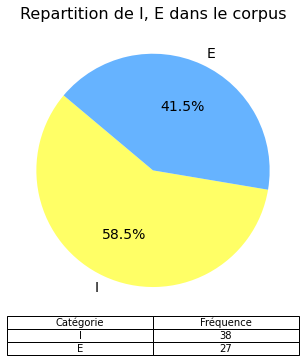

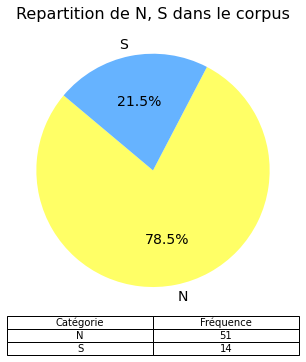

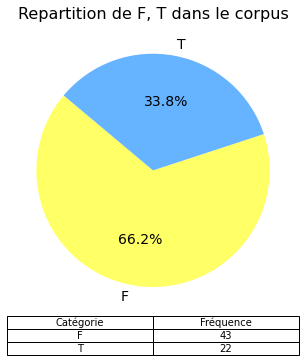

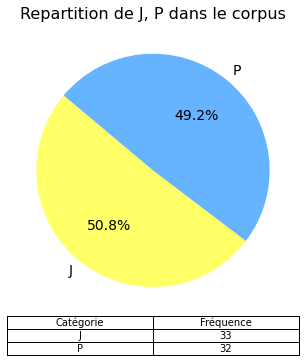

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

def count_and_plot_pie_charts_with_tables(csv_filename, column_number):
    df = pd.read_csv(csv_filename)

    col_name = df.columns[column_number]

    df[f'{col_name}_1'] = df[col_name].str[0]
    df[f'{col_name}_2'] = df[col_name].str[1]
    df[f'{col_name}_3'] = df[col_name].str[2]
    df[f'{col_name}_4'] = df[col_name].str[3]

    for i in range(1, 5):
        part_name = f'{col_name}_{i}'
        value_counts = df[part_name].value_counts()

        clear_yellow = '#FFFF66'
        clear_blue = '#66B3FF'
        colors = [clear_yellow, clear_blue]

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
                textprops={'fontsize': 14})  

        values = ', '.join(value_counts.index[:2]) 
        ax.set_title(f"Repartition de {values} dans le corpus", fontsize=16)

        table_data = [(value, count) for value, count in zip(value_counts.index, value_counts)]
        table = plt.table(cellText=table_data, cellLoc='center', loc='bottom', colLabels=['Catégorie', 'Fréquence'])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.2)

        plt.subplots_adjust(top=0.8) 

        plt.show()

count_and_plot_pie_charts_with_tables('annote_yidi.csv', 0)


# 3. Accuracy

In [392]:
import pandas as pd
def accuracy_ei_ponderer(csv_filename):
    
    I=32
    E=32


    df = pd.read_csv(csv_filename)

    e_correct_annotations = 0
    i_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['EI']

        if 'E' in GOLD and 'E' in test:
            e_correct_annotations += 1
        elif 'I' in test and 'I' in GOLD:
            i_correct_annotations +=1


        e_accuracy = (e_correct_annotations / E) * 100
        i_accuracy= (i_correct_annotations/I)*100

        EI_ac_pond = (e_accuracy*E+i_accuracy*I)/(E+I)
    return EI_ac_pond

def accuracy_NS_ponderer(csv_filename):
    
    N=32
    S=32


    df = pd.read_csv(csv_filename)

    N_correct_annotations = 0
    S_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['NS']

        if 'N' in GOLD and 'N' in test:
            N_correct_annotations += 1
        elif 'S' in test and 'S' in GOLD:
            S_correct_annotations +=1


        S_accuracy = (S_correct_annotations / S) * 100
        N_accuracy= (N_correct_annotations/N)*100

        NS_ac_pond = (S_accuracy*S+N_accuracy*N)/(N+S)
    return NS_ac_pond

def accuracy_PJ_ponderer(csv_filename):
    
    P=32
    J=32


    df = pd.read_csv(csv_filename)

    P_correct_annotations = 0
    J_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['JP']

        if 'P' in GOLD and 'P' in test:
            P_correct_annotations += 1
        elif 'J' in test and 'J' in GOLD:
            J_correct_annotations +=1


        P_accuracy = (P_correct_annotations / P) * 100
        J_accuracy= (J_correct_annotations/J)*100

        PJ_ac_pond = (P_accuracy*P+J_accuracy*J)/(P+J)
    return PJ_ac_pond

def accuracy_FT_ponderer(csv_filename):
    
    F=32
    T=32


    df = pd.read_csv(csv_filename)

    F_correct_annotations = 0
    T_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['FT']

        if 'F' in GOLD and 'F' in test:
            F_correct_annotations += 1
        elif 'T' in test and 'T' in GOLD:
            T_correct_annotations +=1


        F_accuracy = (F_correct_annotations / F) * 100
        T_accuracy= (T_correct_annotations/T)*100

        FT_ac_pond = (F_accuracy*F+T_accuracy*T)/(T+F)
    return FT_ac_pond


In [719]:
EI1=accuracy_ei_ponderer('yidi_twitter.csv')
EI2=accuracy_ei_ponderer('kexin_twitter.csv')
NS2=accuracy_NS_ponderer('kexin_twitter.csv')
NS1=accuracy_NS_ponderer('yidi_twitter.csv')
FT1=accuracy_FT_ponderer('yidi_twitter.csv')
FT2=accuracy_FT_ponderer('kexin_twitter.csv')
PJ1=accuracy_PJ_ponderer('yidi_twitter.csv')
PJ2=accuracy_PJ_ponderer('kexin_twitter.csv')

#EI2=78.125 #50
#PJ2=62.5 #40



print(EI1,EI2,NS1,NS2)
print(FT1,FT2,PJ1,PJ2)

75.0 79.6875 76.5625 84.375
81.25 76.5625 57.8125 60.9375


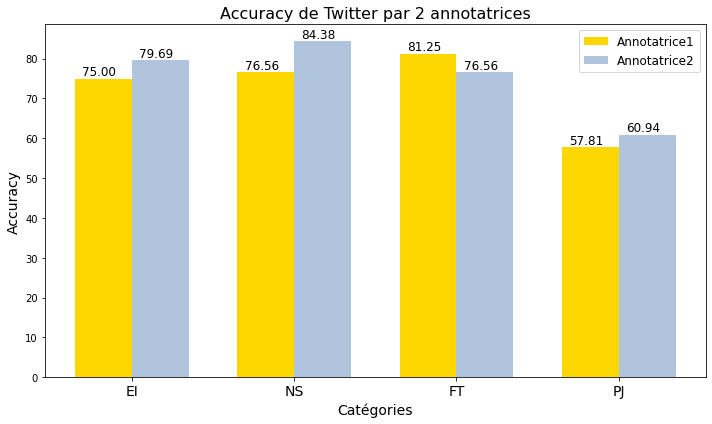

In [720]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual values)
data = {
    'Category': ['EI', 'NS', 'FT', 'PJ'],
    'Annotatrice1': [EI1, NS1, FT1, PJ1],
    'Annotatrice2': [EI2, NS2, FT2, PJ2]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the x-axis labels
x_labels = df['Category']
x = np.arange(len(x_labels))  # X-axis values

# Set the data for plotting
width = 0.35  # Width of each bar

# Create subplots for each category
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size (width, height)

# Define colors for each dataset (yellow and lighter blue)
colors = ['gold', 'lightsteelblue']

# Create bars for each category and dataset with different colors
for i, col in enumerate(['Annotatrice1', 'Annotatrice2']):
    values = df[col]
    bar_positions = x + i * width  # Adjust bar positions for each dataset
    ax.bar(bar_positions, values, width, label=col, color=colors[i])

    # Add value numbers slightly to the left within each column's bar
    for j, value in enumerate(values):
        text_x = bar_positions[j] + width / 2 - 0.2 # Adjust the x-coordinate to move slightly to the left
        ax.text(text_x, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the x-ticks and labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x_labels, fontsize=14)  # Increase the size of letters
ax.set_xlabel('Catégories', fontsize=14)  # Increase the size of the x-axis label
ax.set_ylabel('Accuracy', fontsize=14)  # Increase the size of the y-axis label

# Set the title and legend
ax.set_title('Accuracy de Twitter par 2 annotatrices', fontsize=16)  # Increase the size of the title
ax.legend(fontsize=12)  # Increase the size of the legend

# Show the plot
plt.tight_layout()  # Ensure the plot fits within the figure size
plt.show()


# AIA

Probabilité d'accord (Po) : 0.671875
Probabilité d'accord simultané (Pe) : 0.6484375
kappa : 0.06666666666666667


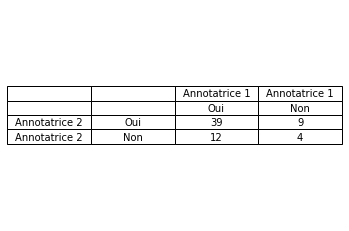

In [721]:
def AIA(test_colone):
    df1 = pd.read_csv('yidi_twitter.csv')
    df2 = pd.read_csv('kexin_twitter.csv')

    A,B,C,D=0,0,0,0
    for index, row1 in df1.iterrows():
        GOLD = row1['GOLD']
        test1 = row1[test_colone]

        row2 = df2.iloc[index] 
        test2 = row2[test_colone]

        if test1 in GOLD and test2 in GOLD :
            A+=1
        elif test1 in GOLD and test2 not in GOLD:
            B+=1
        elif test1 not in GOLD and test2 in GOLD :
            C+=1
        elif test1 not in GOLD and test2 not in GOLD :
            D+=1
    Po=(A+D)/(A+B+C+D)
    Oui= (A+C)/(A+B+C+D)*(A+B)/(A+B+C+D)
    Non=(B+D)/(A+B+C+D)*(C+D)/(A+B+C+D)
    Pe=Oui+Non
    Kappa = (Po-Pe)/(1-Pe)

    print(f"Probabilité d'accord (Po) : {Po}\nProbabilité d'accord simultané (Pe) : {Pe}\nkappa : {Kappa}")
    
    matrice = [['', '', 'Annotatrice 1', 'Annotatrice 1'],
           ['', '', 'Oui', 'Non',],
           ['Annotatrice 2', 'Oui', A, B],
           ['Annotatrice 2', 'Non', C, D]]

    fig, ax = plt.subplots()
    ax.axis('off')  # Masquez les axes

    # Créez un tableau pour afficher la matrice
    table = plt.table(cellText=matrice, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)

    # Affichez le plot
    plt.show()




(AIA('EI'))    

Probabilité d'accord (Po) : 0.703125
Probabilité d'accord simultané (Pe) : 0.6826171875
kappa : 0.06461538461538462


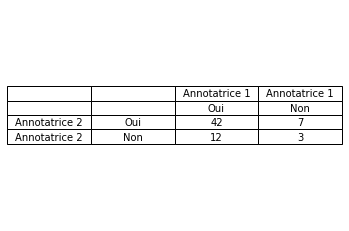

Probabilité d'accord (Po) : 0.6875
Probabilité d'accord simultané (Pe) : 0.67578125
kappa : 0.03614457831325301


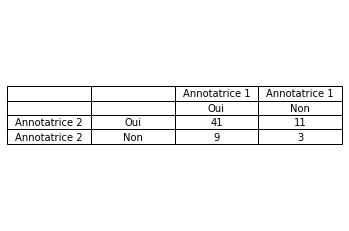

Probabilité d'accord (Po) : 0.71875
Probabilité d'accord simultané (Pe) : 0.51708984375
kappa : 0.41759352881698686


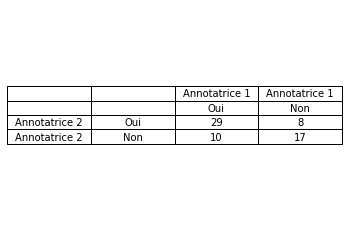

In [722]:
AIA('NS')
AIA('FT')
AIA('JP')

# Preparation for train set

In [136]:
import pandas as pd
import os

df = pd.read_csv('yidi_twitter.csv')

os.makedirs('E', exist_ok=True)
os.makedirs('I', exist_ok=True)

for index, row in df.iterrows():
    col_A = row['GOLD']
    col_F = row['vacances']
    col_G = row['passe-temps']

    if 'J' in col_A:

        target_directory = 'J' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n{col_G}\n')
    if 'P'in col_A:

        target_directory = 'P' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n{col_G}\n')
    


In [401]:
import pandas as pd
import os

df = pd.read_csv('yidi_twitter.csv')

os.makedirs('J', exist_ok=True)
os.makedirs('P', exist_ok=True)

for index, row in df.iterrows():
    col_A = row['GOLD']
    col_F = row['REPONSE']
    #col_G = row['passe-temps']

    if 'J' in col_A:

        target_directory = 'J' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n')
    if 'P'in col_A:

        target_directory = 'P' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n')
    


# Train test

In [402]:
import spacy

# Load the French language model
nlp = spacy.load("fr_core_news_md")


## Lemmatization

In [410]:
import os
import spacy

nlp = spacy.load("fr_core_news_md")

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

input_directory = "TWITTER/EI/I"

output_directory = "TWITTER/EI/I_cleaned"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(input_directory):
    if filename.endswith(".txt"):
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, filename)

        with open(input_path, "r", encoding="utf-8") as input_file:
            text = input_file.read()
            lemmatized_text = lemmatize_text(text)

        with open(output_path, "w", encoding="utf-8") as output_file:
            output_file.write(lemmatized_text)

print("Lemmatization of text files completed.")


Lemmatization of text files completed.


## Stop words

In [419]:
import os
import re

def nettoyage_and_rewrite_directory(directory_path):
    with open('stop-w_fr.txt', 'r', encoding='utf-8') as stop_words_file:
        stop_words = set(stop_words_file.read().splitlines())

    pattern = r'[\wÀ-ÖØ-öø-ÿ]+'

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            
            if file_path.endswith(".txt"):
                with open(file_path, 'r', encoding='utf-8') as input_file:
                    text = input_file.read()

                cleaned_text = ""

                for word in re.findall(pattern, text.lower()):
                    if word not in stop_words:
                        cleaned_text += word + ' '

                with open(file_path, 'w', encoding='utf-8') as output_file:
                    output_file.write(cleaned_text)

directory_path = 'TWITTER/EI/I_cleaned'
nettoyage_and_rewrite_directory(directory_path)


In [423]:
import pandas as pd
import os

def create_csv_from_directory(directory_path, label, output_filename):
    data = []
    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as input_file:
                    response = input_file.read().strip()
                data.append([response, label])
    
    df = pd.DataFrame(data, columns=["reponse", "label"])
    
    df.to_csv(output_filename, mode='a', index=False, header=True)

# Create separate CSV files for the 'EI' and 'I' directories
create_csv_from_directory("TWITTER/EI/E_cleaned", 1, "EI.csv")
create_csv_from_directory("TWITTER/EI/I_cleaned", 0, "EI.csv")


In [424]:
import pandas as pd
df = pd.read_csv('EI.csv',encoding="utf-8")

In [425]:
df.head()

,reponse,label
0,livreur ubereats aller voir cheveu sale chauss...,1
1,ok partir devoir _ devenir riche _ muscler _ p...,1
2,hâte pureeeeeeeee faire année passer vite voul...,1
3,signaler pharo pr apologie terrorisme tlm alle...,1
4,avancer sql réaliser enfer ca devoir charger g...,1


In [426]:
### split data to negatif and positif comment
I=df[df['label']==0]['reponse']
E=df[df['label']==1]['reponse']

In [427]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 4))

In [428]:
X_I = vectorizer.fit_transform(I)
print(vectorizer.get_feature_names_out())

print(X_I.shape)


['10 correctement' '10 correctement espagnol'
 '10 correctement espagnol hyper' ... 'الله hâte' 'الله hâte pk'
 'الله hâte pk chat']
(32, 3043)


In [429]:
I=pd.DataFrame(X_I.toarray(),columns=vectorizer.get_feature_names_out())
I

,10 correctement,10 correctement espagnol,10 correctement espagnol hyper,10 degré,10 degré convaincre,10 degré convaincre sortir,100 jour,100 jour périple,100 jour périple commencer,100 pourcent,...,étudier cours histoire falloir,événement astrologique,événement astrologique hésiter,événement astrologique hésiter ouverture,œuvre arriver,œuvre arriver croire,œuvre arriver croire série,الله hâte,الله hâte pk,الله hâte pk chat
0,0.093659,0.093659,0.093659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.109109,0.109109,0.109109,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [430]:
X_E = vectorizer.fit_transform(E)
print(vectorizer.get_feature_names_out())

print(X_E.shape)

['00h aller' '00h aller train' '00h aller train faire' ...
 'étude consacrer' 'étude consacrer vie' 'étude consacrer vie faire']
(32, 1943)


In [431]:
E=pd.DataFrame(X_E.toarray(),columns=vectorizer.get_feature_names_out())
E

,00h aller,00h aller train,00h aller train faire,10 aimer,10 aimer souci,10 aimer souci faire,100 pourcent,100 pourcent ideau,100 pourcent ideau merde,15 penser,...,énorme feet kink,épisode débattre,épisode débattre inconnu,épisode débattre inconnu twitter,éternuer table,éternuer table venir,éternuer table venir manger,étude consacrer,étude consacrer vie,étude consacrer vie faire
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132453,0.132453,0.132453,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.105409,0.105409,0.105409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [432]:
E.max(axis=1)

0     0.174078
1     0.132453
2     0.123091
3     0.105528
4     0.120386
5     0.136083
6     0.129099
7     0.115470
8     0.132453
9     0.105409
10    0.205196
11    0.149071
12    0.113228
13    0.123091
14    0.218218
15    0.120562
16    0.100504
17    0.129099
18    0.129317
19    0.125988
20    0.218218
21    0.140028
22    0.215666
23    0.100504
24    0.111111
25    0.160128
26    0.154303
27    0.140028
28    0.182574
29    0.160128
30    0.132688
31    0.144338
dtype: float64

In [433]:
### avec toutes les données
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(df['reponse'])
print(vectorizer.get_feature_names_out())

print(X.shape)

['00h' '10' '100' ... 'événement' 'œuvre' 'الله']
(64, 1110)


In [434]:
Mat=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
Mat

,00h,10,100,14,15,1998,1ere,1h,20,2023,...,énorme,épisode,époque,éternuer,étude,étudiant,étudier,événement,œuvre,الله
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.229006,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.204547,0.000000,0.0,0.0,0.186039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.204547,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [435]:
Mat.max(axis=1)

0     0.304087
1     0.333769
2     0.345727
3     0.280244
4     0.224663
        ...   
59    0.332009
60    0.204547
61    0.348237
62    0.649147
63    0.615268
Length: 64, dtype: float64

In [436]:
from sklearn.metrics.pairwise import cosine_similarity
res=pd.DataFrame(cosine_similarity(Mat,Mat))
res

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.000000,0.000000,0.000000,0.028539,0.009932,0.026774,0.000000,0.009495,0.000000,0.025350,...,0.000000,0.000000,0.050105,0.026747,0.015325,0.032081,0.000000,0.042164,0.000000,0.038692
1,0.000000,1.000000,0.020364,0.000000,0.052913,0.021736,0.039846,0.000000,0.000000,0.000000,...,0.040789,0.000000,0.024836,0.000000,0.000000,0.000000,0.083043,0.030966,0.000000,0.000000
2,0.000000,0.020364,1.000000,0.000000,0.019750,0.092851,0.039393,0.000000,0.000000,0.013259,...,0.014093,0.023582,0.086595,0.084286,0.055623,0.006463,0.006335,0.084106,0.026848,0.014292
3,0.028539,0.000000,0.000000,1.000000,0.006063,0.016344,0.000000,0.005796,0.000000,0.015475,...,0.000000,0.036089,0.024474,0.016328,0.009355,0.019584,0.000000,0.048835,0.000000,0.000000
4,0.009932,0.052913,0.019750,0.006063,1.000000,0.021081,0.038646,0.007015,0.027351,0.080098,...,0.032518,0.033415,0.075395,0.005682,0.011322,0.031149,0.026184,0.047094,0.016619,0.017936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.032081,0.000000,0.006463,0.019584,0.031149,0.025271,0.019201,0.006515,0.061950,0.017396,...,0.031100,0.099743,0.034845,0.098122,0.010516,1.000000,0.005773,0.043676,0.037955,0.031312
60,0.000000,0.083043,0.006335,0.000000,0.026184,0.006762,0.000000,0.036340,0.039687,0.032342,...,0.000000,0.006502,0.009374,0.004813,0.000000,0.005773,1.000000,0.014451,0.018723,0.012766
61,0.042164,0.030966,0.084106,0.048835,0.047094,0.065276,0.087779,0.047244,0.000000,0.053627,...,0.021430,0.028999,0.045738,0.055585,0.057031,0.043676,0.014451,1.000000,0.009172,0.032601
62,0.000000,0.000000,0.026848,0.000000,0.016619,0.024376,0.018409,0.000000,0.038543,0.000000,...,0.000000,0.023437,0.005950,0.026625,0.017277,0.037955,0.018723,0.009172,1.000000,0.028833


# Word2vec

In [299]:
df.shape

(65, 2)

In [300]:
import nltk
list_sents = [nltk.word_tokenize(sent) for sent_tok in df['reponse'] for sent in nltk.sent_tokenize(sent_tok)]

In [301]:
list_sents

[['rester',
  'maison',
  'aller',
  'chercher',
  'amie',
  'vacance',
  'long',
  'vouloir',
  'voyager',
  'coucher',
  'jouer',
  'téléphone',
  'faire',
  'repas'],
 ['partir',
  'endroit',
  'connaître',
  'pouvoir',
  'france',
  'europe',
  'idéal',
  'train',
  'voiture',
  'polluer',
  'découvrir',
  'ville',
  'zone',
  'reculer',
  'endroit',
  'compte',
  'imprégner',
  'mode',
  'vie',
  'local',
  'découvrir',
  'culture',
  'gastronomie',
  'amusant',
  'ami',
  'sortir',
  'soir',
  'rue',
  'goûtant',
  'alcool',
  'local',
  'exemple',
  'travail',
  'manuel',
  'acquérir',
  'compétence',
  'pouvoir',
  'fabriquer',
  'chose',
  'chose',
  'gratifier',
  'exemple',
  'crochet',
  'tricot',
  'broderie',
  'couture',
  'chose',
  'calligraphie',
  'origami',
  'pouvoir',
  'rattacher',
  'catégorie',
  'activité',
  'pouvoir',
  'faire',
  'apprendre',
  'chose',
  'domaine',
  'mathématique',
  'alphabet',
  'concept',
  'philosophique',
  'renseigner',
  'sentir',


In [302]:
import multiprocessing
cores = multiprocessing.cpu_count() # compte le nombre de cœurs (core) dans l'ordinateur pour l'entrainement

In [303]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=list_sents, 
                          min_count=20,
                          window=2,
                          vector_size=300,
                          sample=6e-5, 
                          alpha=0.03, 
                          min_alpha=0.0007, 
                          negative=20,
                          workers=cores-1)

In [304]:
import time
tmps1=time.time()

w2v_model.build_vocab(list_sents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time()-tmps1) / 60, 2)))

Time to build vocab: 0.0 mins


In [305]:
t = time.time()

w2v_model.train(list_sents, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [306]:
w2v_model.init_sims(replace=True)

In [307]:
### most similarity
w2v_model.wv.most_similar(positive=["lire"])

[('faire', 0.9824608564376831),
 ('pouvoir', 0.9794012308120728),
 ('vacance', 0.9793071150779724),
 ('temps', 0.9786768555641174),
 ('aimer', 0.9777074456214905),
 ('moment', 0.9775245785713196),
 ('passer', 0.9774415493011475),
 ('découvrir', 0.9768137335777283),
 ('jouer', 0.9748907089233398),
 ('musique', 0.9717845916748047)]

In [308]:
### similarity
w2v_model.wv.similarity("aimer", 'sortir')

0.9754928

In [309]:
### getting a word vector
w2v_model.wv['lire']

array([-2.43785754e-02,  4.52367663e-02, -4.64646099e-03, -4.99078371e-02,
       -4.05397490e-02, -7.67424777e-02,  5.64115308e-02,  1.12332255e-01,
       -2.64855870e-03, -7.51664788e-02,  5.49646206e-02, -9.64890346e-02,
       -8.24260265e-02,  5.28558716e-02, -2.06583533e-02, -8.33811387e-02,
        5.45462370e-02,  6.57890085e-03,  4.18286994e-02,  5.48574850e-02,
       -1.25246746e-02, -4.55659293e-02, -1.41307190e-02,  1.05323002e-01,
       -4.37974595e-02, -8.51085782e-02, -3.70956422e-03,  5.31954132e-02,
        1.42767583e-03, -9.97968316e-02,  1.81189179e-02, -7.33863935e-02,
        6.08552471e-02,  6.72652479e-03,  1.70351863e-02, -5.19393384e-02,
        4.42584418e-02, -4.27296311e-02,  1.18993912e-02,  1.60572454e-02,
       -3.92283835e-02, -4.54210257e-03,  2.54157130e-02,  7.04562431e-03,
       -1.23173371e-02, -9.45905875e-03, -2.43363883e-02,  6.48606056e-03,
        3.66949327e-02,  4.67760749e-02, -1.53700914e-02, -6.32221773e-02,
       -9.74863954e-03, -

In [310]:
import torch
from transformers import CamembertTokenizer,CamembertModel

tokenizer = CamembertTokenizer.from_pretrained('camembert/camembert-large')
model = CamembertModel.from_pretrained('camembert/camembert-large',output_hidden_states=True)

In [311]:
# Extract the last layer's features
line = "J'aime le camembert !"
input_ids = tokenizer.encode(line, return_tensors='pt') 
outputs = model(input_ids)

In [312]:
input_ids.shape

torch.Size([1, 10])

In [313]:
outputs[2][-4:]

(tensor([[[ 0.1587,  0.3786,  0.0825,  ...,  0.1899,  0.0925, -0.2983],
          [ 0.4463, -0.0386, -0.4613,  ...,  0.3045, -0.0562, -0.3966],
          [ 0.0162,  0.4548,  0.4028,  ...,  0.3415,  0.1764, -0.1404],
          ...,
          [ 0.3938,  0.3159, -0.2385,  ...,  0.3451,  0.3870,  0.3684],
          [ 0.1471,  0.0064,  0.3660,  ...,  0.2415, -0.3712,  0.0727],
          [-0.0252, -0.0246,  0.0434,  ...,  0.0147, -0.0142, -0.0358]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[-0.0578,  0.4780,  0.3756,  ...,  0.2118,  0.1431,  0.1120],
          [ 0.2987, -0.2125, -0.5713,  ...,  0.2652, -0.0030, -0.1967],
          [ 0.3370,  0.4695,  0.3492,  ...,  0.1969,  0.0118, -0.1037],
          ...,
          [ 0.3618,  0.3188, -0.2318,  ...,  0.1946,  0.2531,  0.4184],
          [ 0.2292, -0.0217,  0.1935,  ...,  0.1682, -0.2649,  0.2151],
          [-0.0282, -0.0402,  0.0247,  ...,  0.0333,  0.0277, -0.0330]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[-

In [314]:
import pandas as pd
import numpy as np

l=[]
for i in range(-1,-5,-1):
    l.append(pd.DataFrame(np.mean(outputs[2][i].squeeze(0).detach().numpy(),axis=0)).T)
    
pd.concat(l,ignore_index=True).mean(axis=0)

0       0.078970
1       0.036869
2       0.041912
3       0.090438
4       0.144143
          ...   
1019   -0.028084
1020    0.049764
1021    0.029793
1022    0.010036
1023    0.017181
Length: 1024, dtype: float32

# PARTIE 3

In [695]:
import pandas as pd
df = pd.read_csv('JP.csv',encoding="utf-8")

In [682]:
from sklearn.model_selection import train_test_split

reviews = df['reponse']
labels = df['label']

X_train, X_test, y_train, y_test = train_test_split(reviews, labels, random_state = 42, test_size = 0.3)

In [664]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_final = vectorizer.fit_transform(X_train)

print(X_train_final.shape)

(44, 805)


In [665]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC()),])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [666]:
tfid_predictions = text_clf.predict(X_test)

In [667]:
text_clf.score(X_test, y_test)

0.65

## Word2vec

In [634]:
import nltk
list_sents = [nltk.word_tokenize(sent) for sent_tok in X_train for sent in nltk.sent_tokenize(sent_tok)]

In [635]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=list_sents, 
                          min_count=20,
                          window=12,
                          vector_size=80,
                          sample=6e-5, 
                          alpha=0.03, 
                          min_alpha=0.0007, 
                          negative=20,
                          workers=8)

In [636]:
w2v_model.corpus_count

44

In [637]:
import time
tmps1=time.time()

w2v_model.build_vocab(list_sents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time()-tmps1) / 60, 2)))

Time to build vocab: 0.0 mins


In [638]:
t = time.time()

w2v_model.train(list_sents, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [639]:
w2v_model.init_sims(replace=True)

In [640]:
import numpy

### function to get vector
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

### function to sum vector
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

### function to get feature
def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

In [641]:
wv_train_feat = word2vec_features(X_train, w2v_model)
wv_train_feat.shape

(44, 80)

In [642]:
from sklearn.linear_model import LogisticRegression
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

LogisticRegression(max_iter=1000)

In [643]:
### featurisation du data
wv_test_feat = word2vec_features(X_test, w2v_model)

In [644]:
### prediction
w2v_predictions = clfwv.predict(wv_test_feat)

In [645]:
### score
clfwv.score(wv_test_feat, y_test)

0.5

## Camenbert

In [668]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [696]:
camembert, tokenizer, weights = (ppb.CamembertModel, ppb.CamembertTokenizer, 'camembert-base')

tokenizer = tokenizer.from_pretrained(weights)
model = camembert.from_pretrained(weights)

In [697]:
max_len = 0
for i,sent in enumerate(reviews):
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    if len(input_ids) > 512:
        print("annoying review at", i,"with length",
              len(input_ids))
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  69


In [698]:
tokenized = reviews.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

(64, 69)

In [699]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(64, 69)

In [700]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [701]:
features = last_hidden_states[0][:,0,:].numpy()
labels = labels
labels

0     1
1     1
2     1
3     1
4     1
     ..
59    0
60    0
61    0
62    0
63    0
Name: label, Length: 64, dtype: int64

In [702]:
### split data avec les nouvelles features
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [703]:
# Grid search pour le choix du bon parametrage
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 10.526405263157894}
best scrores:  0.5844444444444445


In [704]:
lr_clf = LogisticRegression(C=grid_search.best_params_['C'])
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=10.526405263157894)

In [705]:
camembert_predictions = lr_clf.predict(test_features)

In [706]:
### score
lr_clf.score(test_features, test_labels)

0.5

## 2. Analyse des performences des modèles

In [707]:
from sklearn import metrics

In [659]:
print("Accuracy:", metrics.accuracy_score(y_test, tfid_predictions))
print("Precision:", metrics.precision_score(y_test, tfid_predictions))
print("Recall:", metrics.recall_score(y_test, tfid_predictions))
print("F1-score:", metrics.f1_score(y_test, tfid_predictions))
print("MCC:", metrics.matthews_corrcoef(y_test, tfid_predictions))
print("Confusion matrix:", metrics.confusion_matrix(y_test, tfid_predictions))
print(metrics.classification_report(y_test, tfid_predictions))

Accuracy: 0.5
Precision: 0.5
Recall: 0.3
F1-score: 0.37499999999999994
MCC: 0.0
Confusion matrix: [[7 3]
 [7 3]]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.50      0.30      0.37        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



In [660]:
print("Accuracy:", metrics.accuracy_score(y_test, w2v_predictions))
print("Precision:", metrics.precision_score(y_test, w2v_predictions))
print("Recall:", metrics.recall_score(y_test, w2v_predictions))
print("F1-score:", metrics.f1_score(y_test, w2v_predictions))
print("MCC:", metrics.matthews_corrcoef(y_test, w2v_predictions))
print("Confusion matrix:", metrics.confusion_matrix(y_test, w2v_predictions))
print(metrics.classification_report(y_test, w2v_predictions))

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
MCC: 0.0
Confusion matrix: [[10  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



In [708]:
print("Accuracy:", metrics.accuracy_score(test_labels, camembert_predictions))
print("Precision:", metrics.precision_score(test_labels, camembert_predictions))
print("Recall:", metrics.recall_score(test_labels, camembert_predictions))
print("F1-score:", metrics.f1_score(test_labels, camembert_predictions))
print("MCC:", metrics.matthews_corrcoef(test_labels, camembert_predictions))
print("Confusion matrix:", metrics.confusion_matrix(test_labels, camembert_predictions))
print(metrics.classification_report(test_labels, camembert_predictions))

Accuracy: 0.5
Precision: 0.5
Recall: 0.375
F1-score: 0.42857142857142855
MCC: 0.0
Confusion matrix: [[5 3]
 [5 3]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.50      0.38      0.43         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.50      0.50      0.49        16

